In [1]:
#To execute the following commands, please uncomment
#the code block by removing the '#' character
#at the beginning of each line.

import sys
!{sys.executable} -m pip install kmodes
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Basic Imports
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes

In [4]:
#We read the document
adult = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', \
                   header = None)

#We assign a name for each column for better understanding
adult.columns = ['age', 'workclass','fnlwgt','education','education-num', 'marital-status', \
                 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', \
                 'hours-per-week', 'native-country', 'income']

In [5]:
#Replace '?' with NaN
adult.replace('?', np.nan, inplace=True)

#Drop missing values
adult.dropna(inplace=True)

#Encode categorical variables
cat_vars = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', \
            'race', 'sex', 'native-country', 'income']

for var in cat_vars:
    adult[var] = adult[var].astype('category').cat.codes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 231893.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 231893.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 231893.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 231893.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 231893.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4504, cost: 207641.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5353, cost: 211964.0
Run 2, iteration: 2/100, moves: 0, cost: 211964.0
Init: initia

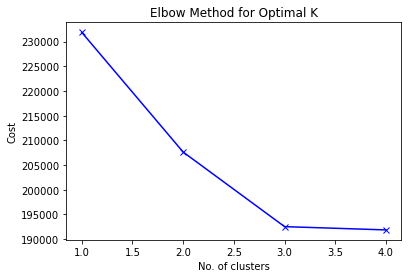

In [7]:
import matplotlib.pyplot as plt

cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(adult)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K')
plt.show()

In [8]:
#Create instance of KModes class
km = KModes(n_clusters=3, init='random', n_init=5, verbose=1)

#Fit KModes model to data
clusters = km.fit_predict(adult)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7607, cost: 196010.0
Run 1, iteration: 2/100, moves: 466, cost: 195958.0
Run 1, iteration: 3/100, moves: 3, cost: 195958.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8473, cost: 201320.0
Run 2, iteration: 2/100, moves: 1037, cost: 201320.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 13192, cost: 198973.0
Run 3, iteration: 2/100, moves: 1610, cost: 198971.0
Run 3, iteration: 3/100, moves: 1, cost: 198971.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3673, cost: 202085.0
Run 4, iteration: 2/100, moves: 4525, cost: 197591.0
Run 4, iteration: 3/100, moves: 1185, cost: 197591.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100

array([1, 0, 1, ..., 1, 1, 0], dtype=uint16)

In [9]:
adult.insert(0, "Cluster", clusters, True)

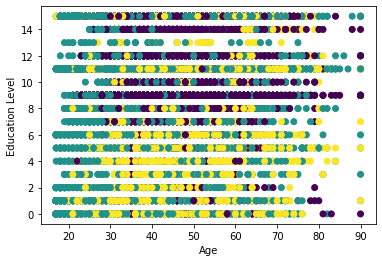

In [10]:
import matplotlib.pyplot as plt

plt.scatter(adult['age'], adult['education'], c=clusters)
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.show()